<a href="https://colab.research.google.com/github/gerhardteduardo/physics-computational/blob/main/schrodinger-equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
## imports ##
import math
import numpy as np
from scipy.special import hermite, factorial
from scipy.integrate import simpson
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [152]:
## global vars ##
n = [ 0, 1, 2, 3]
n_max = 30
x = np.linspace(-5, 5, 200)
a = 5
p = 0.5
times = [0, 0.5, 1, 2, 4, 8, 16]

In [153]:
## functions ##

def phi_n(x, n, m=1, w=1, h=1):
    A = ((m * w)/(np.pi * h))**0.25 / np.sqrt(2**n * factorial(n))
    Xi = (m * w / h)**0.25 * x
    H_n = hermite(n)
    return A * H_n(Xi) * np.exp(-Xi**2 / 2)

def psi_0(x, a):
  return np.sqrt(2 * a / np.pi) * np.exp(-a * x**2)

def psi_0_complex(x, a, p=0.5):
    return np.sqrt(2 * a / np.pi) * np.exp(-a * x**2 + 1j*p*x)

def psi_xt(x, t, coeffs, m=1, w=1, h=1):
    psi = np.zeros_like(x, dtype=complex)
    for n, Cn in enumerate(coeffs):
        E_n = (n + 0.5) * w
        psi += Cn * phi_n(x, n) * np.exp(-1j * E_n * t)
    return psi

def cn(x, n_max, a, psi0):
    coeffs = np.zeros(n_max + 1, dtype=complex)
    for n in range(n_max + 1):
        integrando = np.conj(phi_n(x, n)) * psi0(x, a)
        coeffs[n] = simpson(integrando, x)
    return coeffs

#1 — |Phi_n|² of OH



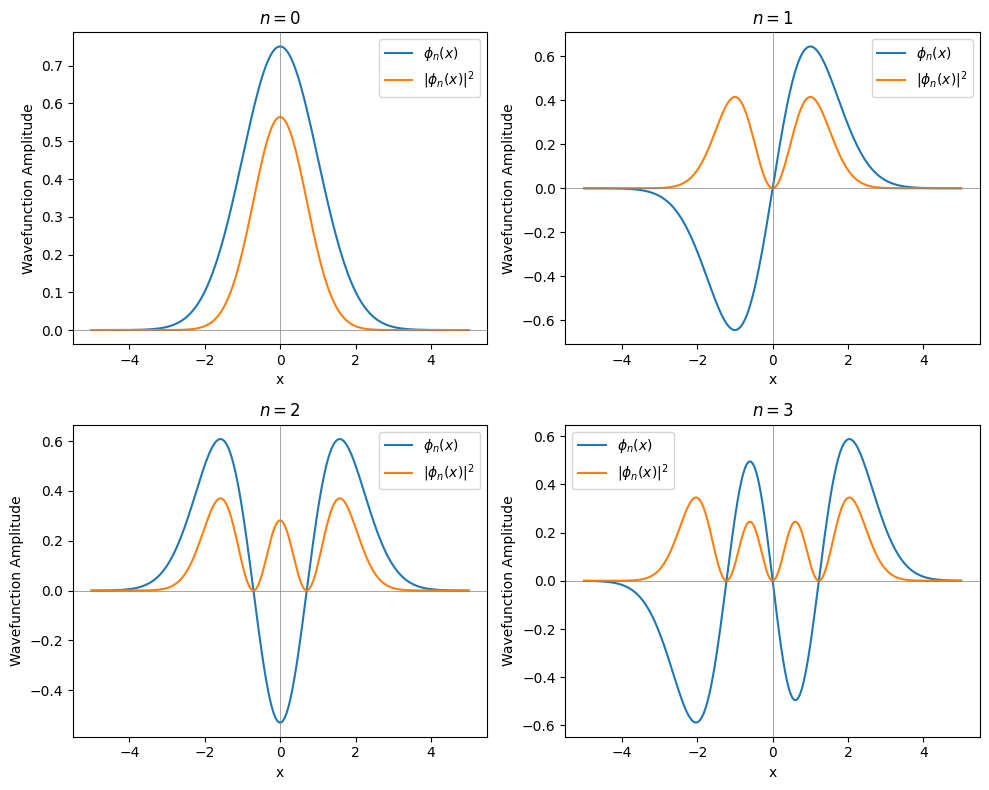

In [155]:
# first plot
print('#1 — |Phi_n|² of OH\n')
plt.figure(figsize=(10, 8))
for i in n:
    plt.subplot(2, 2, i+1)
    plt.plot(x, phi_n(x, i), label=r'$\phi_n(x)$')
    plt.plot(x, phi_n(x, i)**2, label=r'$|\phi_n(x)|^2$')
    plt.title(f'$n = {i}$')
    plt.xlabel('x'); plt.ylabel('Wavefunction Amplitude')
    plt.axvline(x=0, color='gray', linewidth=0.5)
    plt.axhline(y=0, color='gray', linewidth=0.5)
    plt.legend()

plt.tight_layout(); plt.show()

#2 — Plot the probability density |ψ(x,t)|² for a purely real Gaussian initial state ψ(x,0).



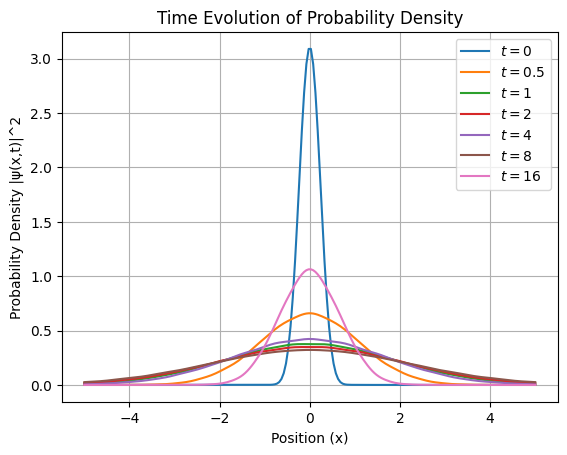

In [157]:
# second plot
print('#2 — Plot the probability density |ψ(x,t)|² for a purely real Gaussian initial state ψ(x,0).\n')
psi_squared_dict = {}

for t in times:
    psi_t = psi_xt(x, t, cn(x, n_max, a, psi_0))
    psi_squared_dict[f't={t}'] = np.abs(psi_t)**2

for t, psi_squared in psi_squared_dict.items():
    plt.plot(x, psi_squared, label=f'${t}$')

plt.title('Time Evolution of Probability Density')
plt.xlabel('Position (x)')
plt.ylabel('Probability Density |ψ(x,t)|^2')
plt.grid(True)
plt.legend()
plt.show()

#3 — Plot the probability density |Psi(x,t)|² for a Gaussian initial state with a complex phase.



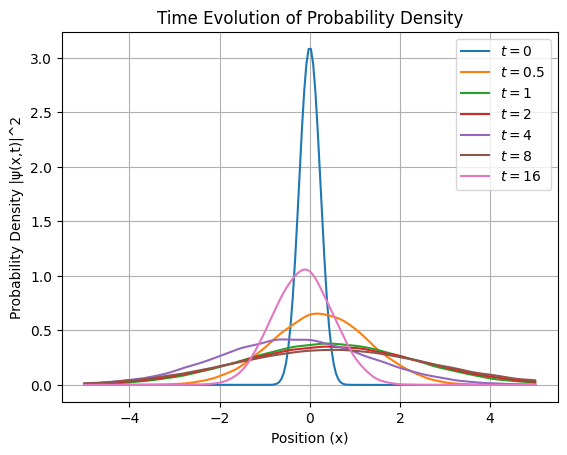

In [158]:
# third plot
print('#3 — Plot the probability density |Psi(x,t)|² for a Gaussian initial state with a complex phase.\n')
psi_squared_dict = {}

for t in times:
    psi_t = psi_xt(x, t, cn(x, n_max, a, psi_0_complex))
    psi_squared_dict[f't={t}'] = np.abs(psi_t)**2

for t, psi_squared in psi_squared_dict.items():
    plt.plot(x, psi_squared, label=f'${t}$')

plt.title('Time Evolution of Probability Density')
plt.xlabel('Position (x)')
plt.ylabel('Probability Density |ψ(x,t)|^2')
plt.grid(True)
plt.legend()
plt.show()

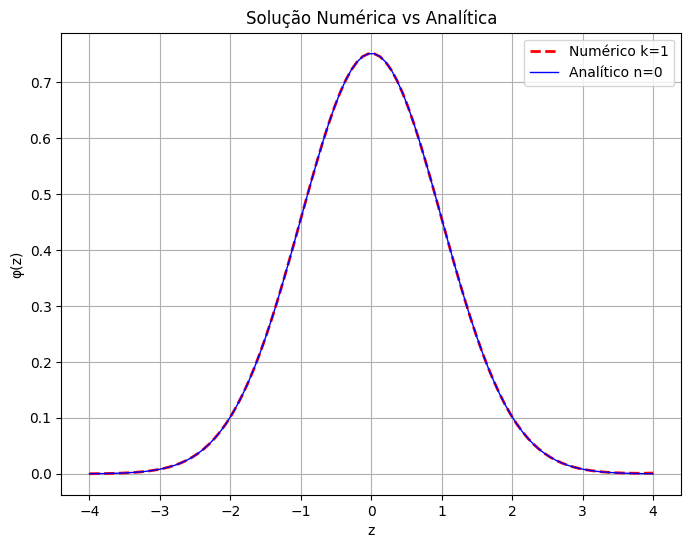

In [171]:
n_quantum = 0
constant_k = 2 * n_quantum + 1

def analytic_solution(n, z):
    return np.exp(-z**2 / 2) / np.sqrt(np.sqrt(np.pi))

def differential_equation(z, y, k):
    phi, dphi = y
    d2phi = (z**2 - k) * phi
    return [dphi, d2phi]

z_start = -4
z_end = 4
z_points = np.linspace(z_start, z_end, 100)

phi_initial = analytic_solution(n_quantum, z_start)
delta_z = 0.001
phi_initial_deriv = (analytic_solution(n_quantum, z_start + delta_z) -
                    analytic_solution(n_quantum, z_start)) / delta_z
initial_conditions = [phi_initial, phi_initial_deriv]

solution = solve_ivp(differential_equation, [z_start, z_end], initial_conditions,
                    args=(constant_k,), t_eval=z_points, method='Radau')

phi_numeric = solution.y[0]
max_numeric = np.max(np.abs(phi_numeric))
max_analytic = np.max(np.abs(analytic_solution(n_quantum, z_points)))
phi_numeric = phi_numeric / max_numeric * max_analytic

plt.figure(figsize=(8, 6))
plt.plot(z_points, phi_numeric, 'r--', linewidth=2, label=f'Numérico k={constant_k}')
plt.plot(z_points, analytic_solution(n_quantum, z_points), 'b-',
         linewidth=1, label=f'Analítico n={n_quantum}')
plt.xlabel('z')
plt.ylabel('φ(z)')
plt.title('Solução Numérica vs Analítica')
plt.legend()
plt.grid(True)
plt.show()